In [1]:
import torch
import torch.nn  as nn  ## contains all pytorch building blocks for neural network
### https://pytorch.org/tutorials/beginner/nn_tutorial.html
import matplotlib.pyplot as plt ## For visualisation


In [2]:
## create some known parameters
weight = 0.7
bias = 0.4

In [3]:
## Create sample data
X = torch.arange(0,1,0.02).unsqueeze(1)
y = weight * X + bias ## Linear regression formula
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.4000],
         [0.4140],
         [0.4280],
         [0.4420],
         [0.4560],
         [0.4700],
         [0.4840],
         [0.4980],
         [0.5120],
         [0.5260]]))

In [4]:
len(X),len(y)

(50, 50)

In [5]:
## Splitting data into training and testing
### https://machinelearningcompass.com/dataset_optimization/split_data_the_right_way/
### https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
### https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(X_test)

(40, 10)

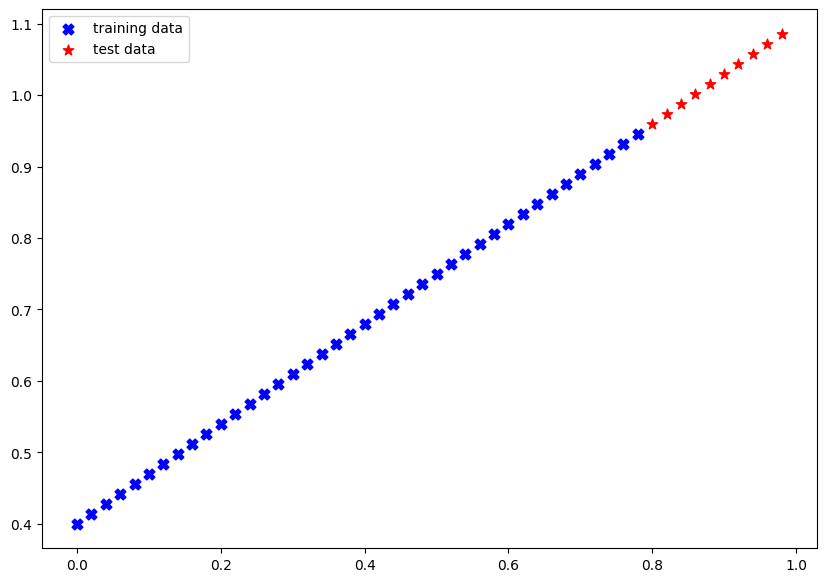

In [6]:
## Visualising our data
### https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, color = 'b',  s = 60, label = 'training data', marker = 'X' )
plt.scatter(X_test, y_test, c = 'r', s = 60, label = 'test data', marker = '*')
plt.legend()
plt.show()

In [31]:
## Create a linear regression model class
class LinearRegression(nn.Module): ## Base class for neural network
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, ## generate random weight and adjust to get better ideal values 
                                               requires_grad = True,
                                               dtype = torch.float))
        self.bias = nn.Parameter(torch.randn(1, ## generate random weight and adjust throughout the training..
                                            requires_grad = True,
                                            dtype = torch.float))
    def forward(self, x): ## x is our input data
        return self.weights * x + self.bias ## linear regression formula


In [32]:
## Create a model from class 
## create manual seed for reproducable model inital parameters
torch.manual_seed(42)
## Create an instance of model class
model = LinearRegression()
## Print model parameters
list(model.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [33]:
## Print list of named parameters
model.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [10]:
## During training these weights are adjust to be as close as possible to the known parametetrs value
## In most cases we don't know the ideal values, Here we already knows that.(weight and bias).

In [11]:
## Make some predictions without train the model
## Make prediction using torch.inference mode()
## To check our model's predictive power.
with torch.inference_mode():  ## Inference mode stop the gradient tracking, either use torch.no_grad() also.., 
    ## But infernece mode have advantages over no_grad()
    ### https://pytorch.org/docs/stable/generated/torch.autograd.grad_mode.inference_mode.html
    ### https://discuss.pytorch.org/t/pytorch-torch-no-grad-vs-torch-inference-mode/134099
    y_pred = model(X_test)
y_pred  ## Predicted Output

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [12]:
y_test ## Actual Output

tensor([[0.9600],
        [0.9740],
        [0.9880],
        [1.0020],
        [1.0160],
        [1.0300],
        [1.0440],
        [1.0580],
        [1.0720],
        [1.0860]])

In [13]:
## So here we can see that the backward gradient calculation, Because we didn't use the inference mode, But the prediction values are same as above.
# y_pred = model(X_test)
# y_pred

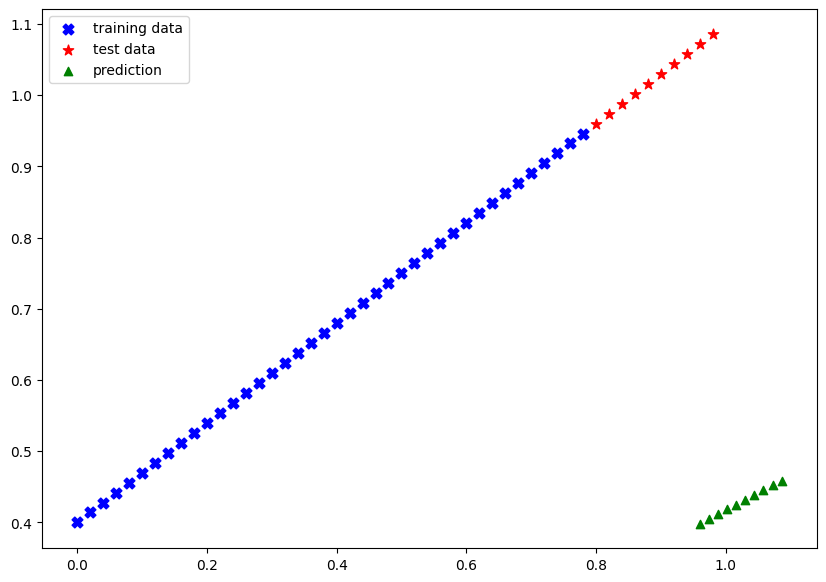

In [14]:
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, color = 'b',  s = 60, label = 'training data', marker = 'X' )
plt.scatter(X_test, y_test, c = 'r', s = 60, label = 'test data', marker = '*')
plt.scatter(y_test, y_pred, c = 'g', marker = '^',label = 'prediction') ## plot y_pred with y_test
plt.legend()
plt.show()

In [34]:
## For train our model
## First we need to set our loss function and optimizer
## Loss function ==> Measure how wrong our model's predictiona are to the ideal outputs, lower is better
### https://pytorch.org/docs/stable/nn.html#loss-functions
## Optimizer ==> Takes the loss of the model and adjust the model's parameters
### https://pytorch.org/docs/stable/optim.html
loss_function = nn.L1Loss() ### https://pytorch.org/docs/stable/generated/torch.nn.L1Loss.html
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)
## SGD stohastic gradient descent is a popular optimizer
## lr ==> learning rate (hyperparameter) ==> large lr leads large changes while,
## small lr leads small changes and converge to global minima smoothly.
### https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate

In [16]:
## Which loss function and optimizer should we use ??
## Choosing optimizer and loss function is problem specific try to get better with try and error
## But there are soem specific for classificartion and regression problem, If we use those in another proble it doesn't work properly.

In [17]:
## Build a training and testing loop
## Steps :>
## Look through the data 
## Forward pass ==> pass data to model and make prediction
## Calculate loss ==> compare the predicted and actual output
## Optimizer zero grad
## Loss backward ==> backpropagation (calculate gradient of each parameter of loss)
## Optimizer step ==> using calculated gradient update our model parameters

In [18]:
model.state_dict() ## Intially our parameter are this adjust this into what we given, 
## then we got the right output (weight = 0.7, bias = 0.4)

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [19]:
epochs = 1 ## An epoch is one lopp throught the data

for epoch in range(epochs):
    
    model.train() ## Set the model to training mode!!
## train mode in pytorch set require grad in all parameters = True
## model.eval() ==> turn off gradient tracking 
## Also if we use dropout batch normalisation layers in our model these two behaves differently. 
    
    y_pred = model(X_train) ## Forward pass :: make predictions
    
    loss = loss_function(y_pred, y_train) ## Calculate the losss
    print("loss :", loss)
    
    optimizer.zero_grad() ## Set the gradients of previous iteration to zero
    
    loss.backward() ## Perform backpropagation on loss w.r.t each parameters (finding dgradient)
    
    optimizer.step() ## Update the model parameters (gradient descent)

loss : tensor(0.4129, grad_fn=<MeanBackward0>)


In [20]:
## In the first epoch we got loss .4 and let check the parameters:>
model.state_dict()

OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])

In [21]:
## Here we can see that after one epoch,
## when call the optimizer_step() the model parameters are updated..
## weight changes from 0.3367 -> 0.3406 and bias 0.1288 -> 0.1388
## this changes occur only in one epoch as we increase the number of epochs, the parameters are adjust to the ideal values

In [22]:
## So we can increase our training epochs and look the output!!!
epochs = 30

for epoch in range(epochs):
    model.train()
    y_pred = model(X_train)
    loss = loss_function(y_pred, y_train)
    print("loss :",loss)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print(model.state_dict())

loss : tensor(0.4014, grad_fn=<MeanBackward0>)
OrderedDict([('weights', tensor([0.3445])), ('bias', tensor([0.1488]))])
loss : tensor(0.3898, grad_fn=<MeanBackward0>)
OrderedDict([('weights', tensor([0.3484])), ('bias', tensor([0.1588]))])
loss : tensor(0.3783, grad_fn=<MeanBackward0>)
OrderedDict([('weights', tensor([0.3523])), ('bias', tensor([0.1688]))])
loss : tensor(0.3668, grad_fn=<MeanBackward0>)
OrderedDict([('weights', tensor([0.3562])), ('bias', tensor([0.1788]))])
loss : tensor(0.3553, grad_fn=<MeanBackward0>)
OrderedDict([('weights', tensor([0.3601])), ('bias', tensor([0.1888]))])
loss : tensor(0.3438, grad_fn=<MeanBackward0>)
OrderedDict([('weights', tensor([0.3640])), ('bias', tensor([0.1988]))])
loss : tensor(0.3322, grad_fn=<MeanBackward0>)
OrderedDict([('weights', tensor([0.3679])), ('bias', tensor([0.2088]))])
loss : tensor(0.3207, grad_fn=<MeanBackward0>)
OrderedDict([('weights', tensor([0.3718])), ('bias', tensor([0.2188]))])
loss : tensor(0.3092, grad_fn=<MeanBackw

In [23]:
## As see above the loss is decreasing on every epochs and the parameters are updating
## Lets predict some values using X_test and plot the difference

loss : tensor(0.1831)


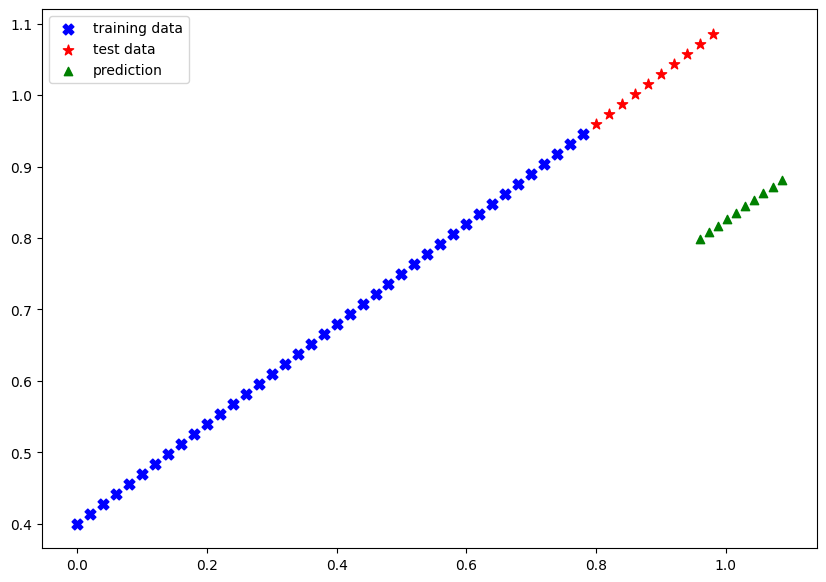

In [24]:
model.eval() ## Set for evaluation
with torch.no_grad():
    y_pred_new = model(X_test)
    loss = loss_function(y_pred_new, y_test)
    print("loss :", loss) ## Printing the testing loss
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, color = 'b',  s = 60, label = 'training data', marker = 'X' )
plt.scatter(X_test, y_test, c = 'r', s = 60, label = 'test data', marker = '*')
plt.scatter(y_test, y_pred_new, c = 'g', marker = '^',label = 'prediction') ## plot y_pred with y_test
plt.legend()
plt.show()

In [29]:
## As you can see the predictions we done using the X_test is more closer than when we done without doing the trainig
## So we can implement the training and tetsing in a single loop to easly analysis the process undertaking, thats helps us to troubleshoot...

epochs = 200

for epoch in range(epochs):
    model.train()
    y_pred = model(X_train)
    loss = loss_function(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model.eval()
    with torch.inference_mode(): ## or torch.no_grad()
        y_pred_new = model(X_test)
        test_loss = loss_function(y_pred_new, y_test)
    if epoch % 10 == 0: ## print the loss in every 10 epoch only
        print(f'epoch :{epoch}, train loss :{loss}, test loss :{test_loss}')
        print(model.state_dict())

epoch :0, train loss :0.41288137435913086, test loss :0.5810651779174805
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
epoch :10, train loss :0.2976713180541992, test loss :0.4463551640510559
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
epoch :20, train loss :0.18246141076087952, test loss :0.3116453289985657
OrderedDict([('weights', tensor([0.4186])), ('bias', tensor([0.3388]))])
epoch :30, train loss :0.07432593405246735, test loss :0.18313124775886536
OrderedDict([('weights', tensor([0.4574])), ('bias', tensor([0.4328]))])
epoch :40, train loss :0.04388336092233658, test loss :0.11712293326854706
OrderedDict([('weights', tensor([0.4888])), ('bias', tensor([0.4708]))])
epoch :50, train loss :0.03826197236776352, test loss :0.0926765650510788
OrderedDict([('weights', tensor([0.5107])), ('bias', tensor([0.4758]))])
epoch :60, train loss :0.034725259989500046, test loss :0.08165650069713593
OrderedDict([('weights', tensor([0.5287]))

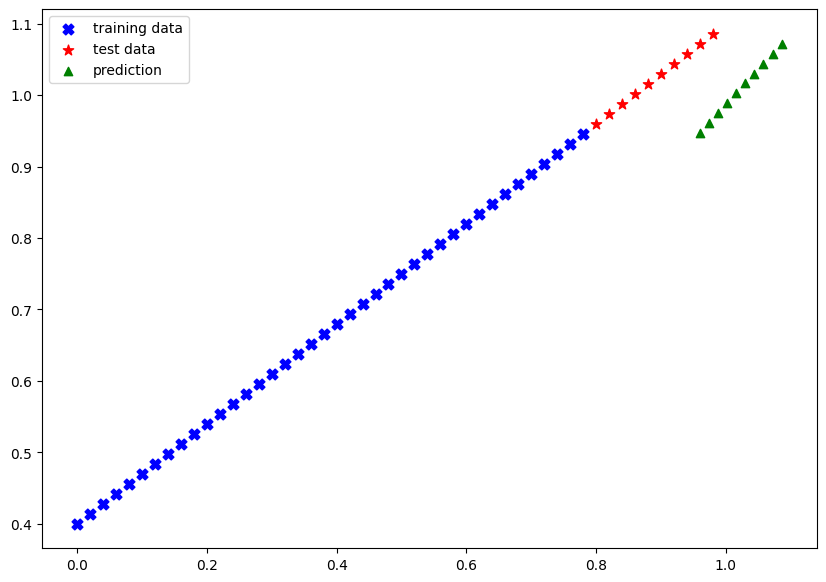

In [30]:
## We can see that the loss is decresing in every epochs and the parameters are updating
## lets plot the graph using this data
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, color = 'b',  s = 60, label = 'training data', marker = 'X' )
plt.scatter(X_test, y_test, c = 'r', s = 60, label = 'test data', marker = '*')
plt.scatter(y_test, y_pred_new, c = 'g', marker = '^',label = 'prediction') ## plot y_pred with y_test
plt.legend()
plt.show()

In [35]:
## Predicted values are moving  close to the actual outputs!!!....
## Track the loss of the training and testing
## For this we can store the each loss into a list and at last we can plot that list
## Lets rewrite the above code, we can store and plot the graph...
epochs = 100
train_loss = [] ## For store the train loss
test_loss = [] ## For store the test loss

for epoch in range(epochs):
    model.train()
    y_pred = model(X_train)
    loss = loss_function(y_pred, y_train)
    train_loss.append(loss.item()) ## Loss is typically a tensor value to obtain the scalar value from it we use the loss.item(), & append to list
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model.eval()
    with torch.inference_mode(): ## or torch.no_grad()
        y_pred_new = model(X_test)
        test_loss_ = loss_function(y_pred_new, y_test)
        test_loss.append(test_loss_.item()) ## Appending test loss to the list
    if epoch % 10 == 0: ## print the loss in every 10 epoch only
        print(f'epoch :{epoch}, train loss :{loss}, test loss :{test_loss_}')
        print(model.state_dict())

epoch :0, train loss :0.41288137435913086, test loss :0.5810651779174805
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
epoch :10, train loss :0.2976713180541992, test loss :0.4463551640510559
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
epoch :20, train loss :0.18246141076087952, test loss :0.3116453289985657
OrderedDict([('weights', tensor([0.4186])), ('bias', tensor([0.3388]))])
epoch :30, train loss :0.07432593405246735, test loss :0.18313124775886536
OrderedDict([('weights', tensor([0.4574])), ('bias', tensor([0.4328]))])
epoch :40, train loss :0.04388336092233658, test loss :0.11712293326854706
OrderedDict([('weights', tensor([0.4888])), ('bias', tensor([0.4708]))])
epoch :50, train loss :0.03826197236776352, test loss :0.0926765650510788
OrderedDict([('weights', tensor([0.5107])), ('bias', tensor([0.4758]))])
epoch :60, train loss :0.034725259989500046, test loss :0.08165650069713593
OrderedDict([('weights', tensor([0.5287]))

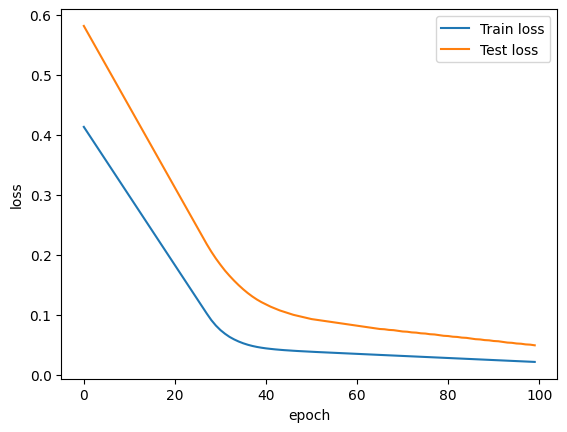

In [36]:
plt.plot(range(epochs), train_loss, label = "Train loss")
plt.plot(range(epochs), test_loss, label = "Test loss")
plt.xlabel("epoch") ## Label for x-axis
plt.ylabel("loss") ## Label for y-axis
plt.legend() ## Create a legend box for showing the labels in graph 
### https://matplotlib.org/stable/users/explain/axes/legend_guide.html#legend-guide
plt.show()
## For more plotting reference :-
### https://matplotlib.org/stable/users/explain/quick_start.html

In [37]:
## For more pytorch references ==>
### https://pytorch.org/tutorials/beginner/ptcheat.html